# Filtering neural signals using neurodsp.filt

This notebook shows how to use the neurodsp module to filter neural signals. It is broken down into the following sections:

1. Bandpass filter - extract a single oscillator from your signal
2. Highpass, lowpass, and bandstop filters - remove power in unwanted frequency ranges
3. Time-frequency resolution tradeoff - Change the filter length, N_cycles and N_taps
4. Infinite-impulse-response (IIR) filter option.
5. Beta bandpass filter on a neural signal

In [1]:
import numpy as np
import neurodsp

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Bandpass filter
Extract signal within a specific frequency range (e.g. theta, 4-8Hz)

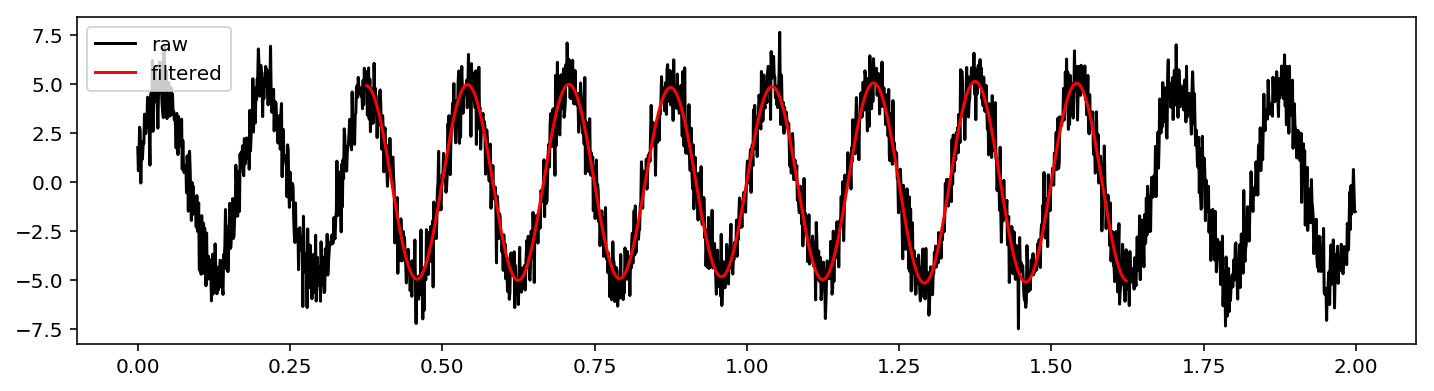

In [2]:
# Generate an oscillation with noise
np.random.seed(0)
t = np.arange(0,2,.001)
x = np.random.randn(len(t)) + 5*np.sin(t*2*np.pi*6)
Fs = 1000

# Define the frequency band of interest
f_lo = 4
f_hi = 8

# Filter the data
x_filt = neurodsp.filter(x, Fs, 'bandpass', f_lo=f_lo, f_hi=f_hi)

# Plot filtered signal
plt.figure(figsize=(12,3))
plt.plot(t, x, 'k', label='raw')
plt.plot(t, x_filt, 'r', label='filtered')
plt.legend(loc='best')

# 2. Highpass, lowpass, and bandstop filters

### 2a. Highpass filter
Remove low frequency drift from the data

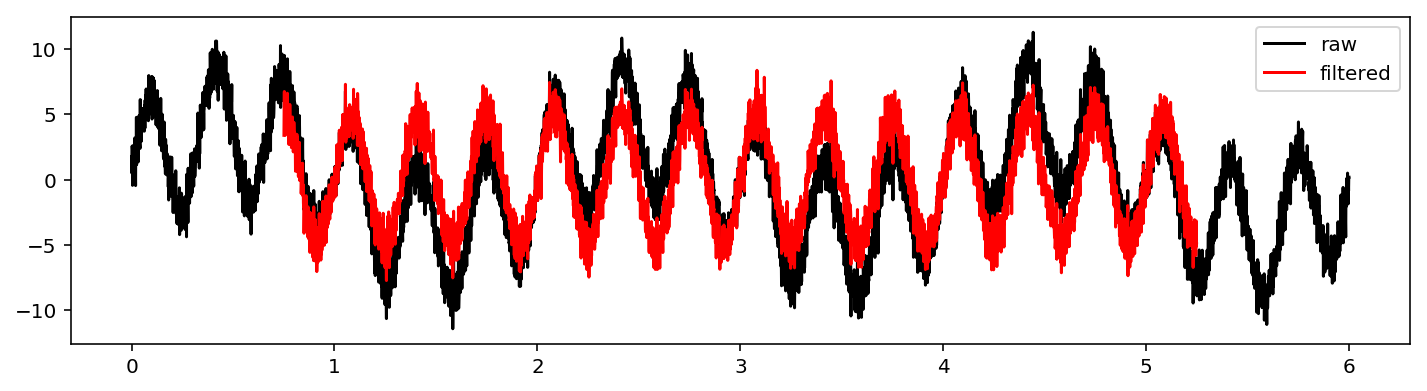

In [3]:
# Generate a signal with a low-frequency drift
np.random.seed(0)
t = np.arange(0,6,.001)
x = np.random.randn(len(t)) + 5*np.sin(t*2*np.pi*3) + 4*np.sin(t*2*np.pi*.5)

# Filter the data
f_hi = 2
x_filt = neurodsp.filter(x, Fs, 'highpass', f_hi=f_hi)

# Plot filtered signal
plt.figure(figsize=(12,3))
plt.plot(t, x, 'k', label='raw')
plt.plot(t, x_filt, 'r', label='filtered')
plt.legend(loc='best')

### 2b. Lowpass filter
Remove high frequency noise from the data

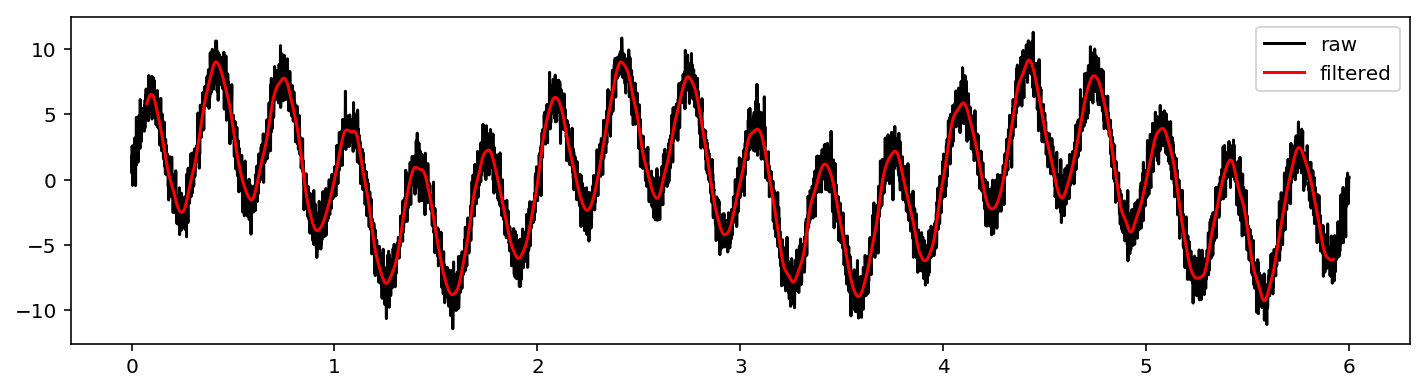

In [4]:
# Generate a signal with a low-frequency drift
np.random.seed(0)
t = np.arange(0,6,.001)
x = np.random.randn(len(t)) + 5*np.sin(t*2*np.pi*3) + 4*np.sin(t*2*np.pi*.5)

# Filter the data
f_lo = 20
x_filt = neurodsp.filter(x, Fs, 'lowpass', f_lo=f_lo)

# Plot filtered signal
plt.figure(figsize=(12,3))
plt.plot(t, x, 'k', label='raw')
plt.plot(t, x_filt, 'r', label='filtered')
plt.legend(loc='best')

### 2c. Bandstop filter
Remove 60Hz noise from the data

* Notice that it is necessary to set a nondefault filter length because a filter of length 3 cycles of a 58Hz oscillation would not attenuate the 60Hz oscillation much (try this yourself!).

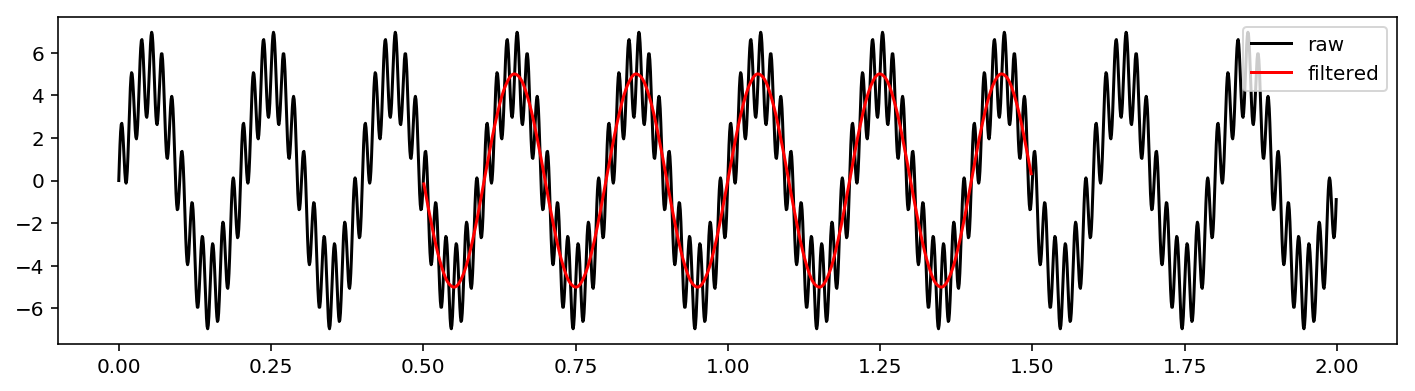

In [5]:
# Generate a signal with a low-frequency drift
np.random.seed(0)
t = np.arange(0,2,.001)
x = 5*np.sin(t*2*np.pi*5) + 2*np.sin(t*2*np.pi*60)

# Filter the data
f_lo = 58
f_hi = 62
x_filt = neurodsp.filter(x, Fs, 'bandstop', f_lo=f_lo, f_hi=f_hi, N_seconds=1)

# Plot filtered signal
plt.figure(figsize=(12,3))
plt.plot(t, x, 'k', label='raw')
plt.plot(t, x_filt, 'r', label='filtered')
plt.legend(loc='best')

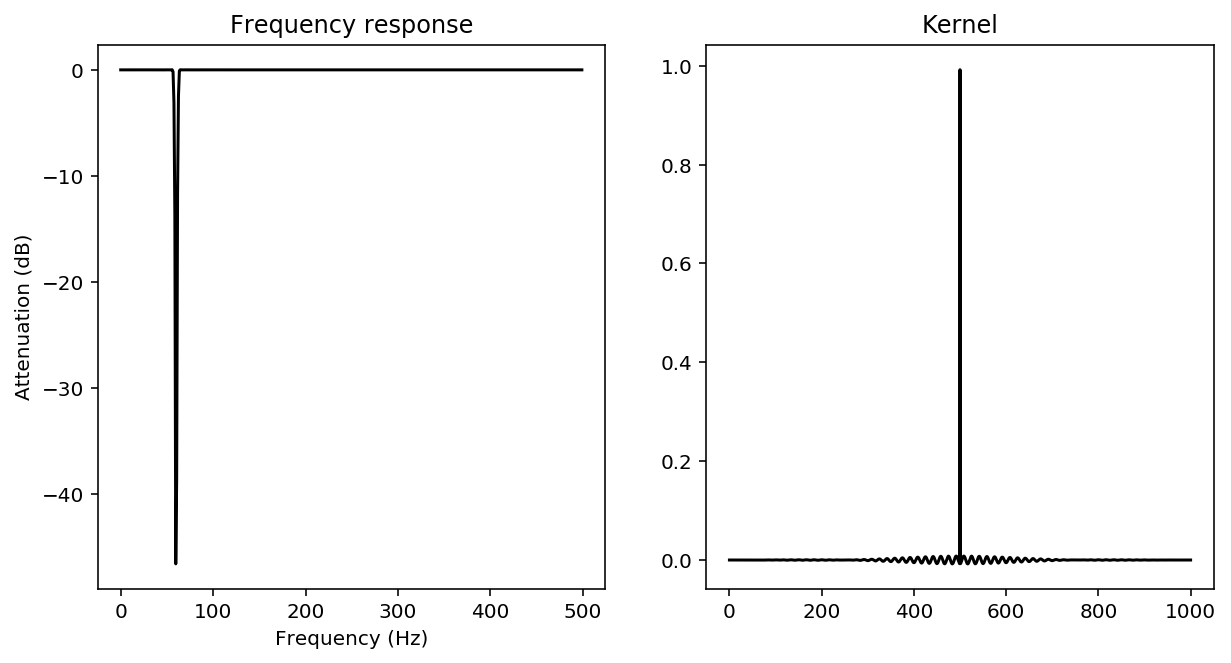

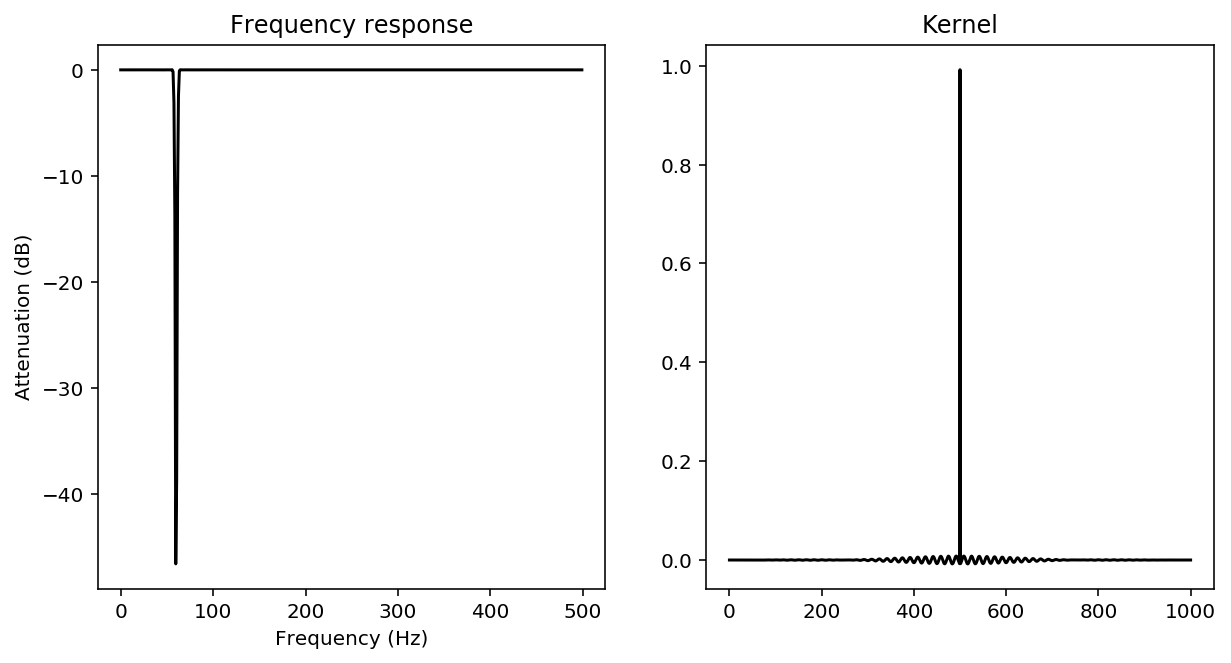

In [6]:
# Note the user warning above.
# This is because in the computed frequency response (below), the attenuation in the stopband does not go below 20dB.
x_filt = neurodsp.filter(x, Fs, 'bandstop', f_lo=f_lo, f_hi=f_hi, N_seconds=1, plot_frequency_response=True)

# This user warning disappears if we elongate the filter
x_filt = neurodsp.filter(x, Fs, 'bandstop', f_lo=f_lo, f_hi=f_hi, N_seconds=1, plot_frequency_response=True)

# 3. Time-frequency resolution tradeoff

With longer filter kernels, we get improved frequency resolution, but worse time resolution

### Two bandpass filters (one long and one short)

Notice that the short filter preserves the start of the oscillation better than the long filter (i.e. better time resolution).

Notice that the long filter correctly removed the 1Hz oscillation, but the short filter did not (i.e. better frequency resolution).

In [7]:
# Generate an oscillation with noise
np.random.seed(0)
t = np.arange(0,3,.01)
x = np.random.randn(len(t))*.3 + 5*np.sin(t*2*np.pi*6) + 4*np.sin(t*2*np.pi*1)
Fs = 100

# Set the first second to 0
x[:Fs] = 0

# Define the frequency band of interest
f_lo = 4
f_hi = 8

/gh/bv/neurodsp/neurodsp/filt.py:186: UserWarning: The low frequency stopband never gets attenuated by more than 20dB. Increase filter length.
  warnings.warn('The low frequency stopband never gets attenuated by more than 20dB. Increase filter length.')
/gh/bv/neurodsp/neurodsp/filt.py:220: UserWarning: Transition bandwidth is 9.9 Hz. This is greater than the desired pass/stop bandwidth of 4 Hz
  warnings.warn('Transition bandwidth is ' + str(np.round(transition_bw, 1)) + ' Hz. This is greater than the desired pass/stop bandwidth of ' + str(np.round(pass_bw, 1)) + ' Hz')


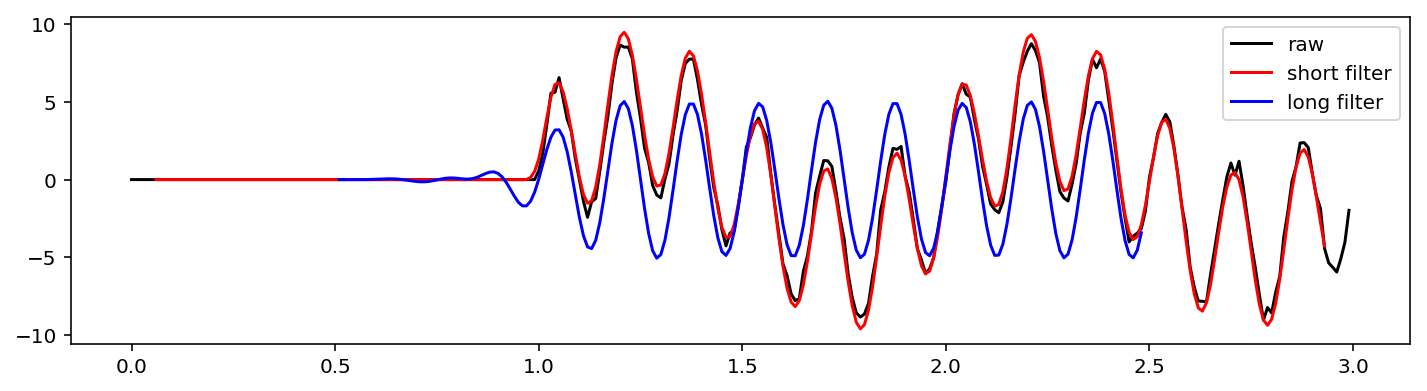

In [8]:
# Filter the data
x_filt_short = neurodsp.filter(x, Fs, 'bandpass', f_lo=f_lo, f_hi=f_hi, N_seconds=.1)
x_filt_long = neurodsp.filter(x, Fs, 'bandpass', f_lo=f_lo, f_hi=f_hi, N_seconds=1)

# Plot filtered signal
plt.figure(figsize=(12,3))
plt.plot(t, x, 'k', label='raw')
plt.plot(t, x_filt_short, 'r', label='short filter')
plt.plot(t, x_filt_long, 'b', label='long filter')
plt.legend(loc='best')

Short filter


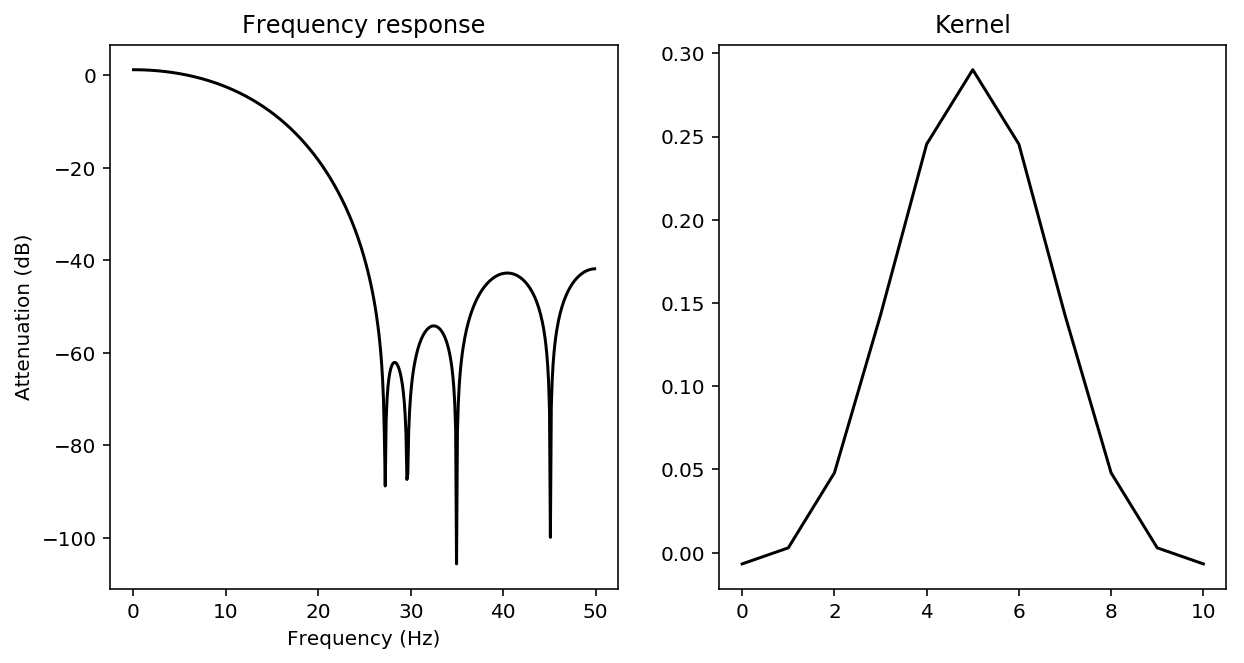

/gh/bv/neurodsp/neurodsp/filt.py:186: UserWarning: The low frequency stopband never gets attenuated by more than 20dB. Increase filter length.
  warnings.warn('The low frequency stopband never gets attenuated by more than 20dB. Increase filter length.')
/gh/bv/neurodsp/neurodsp/filt.py:220: UserWarning: Transition bandwidth is 9.9 Hz. This is greater than the desired pass/stop bandwidth of 4 Hz
  warnings.warn('Transition bandwidth is ' + str(np.round(transition_bw, 1)) + ' Hz. This is greater than the desired pass/stop bandwidth of ' + str(np.round(pass_bw, 1)) + ' Hz')




Long filter


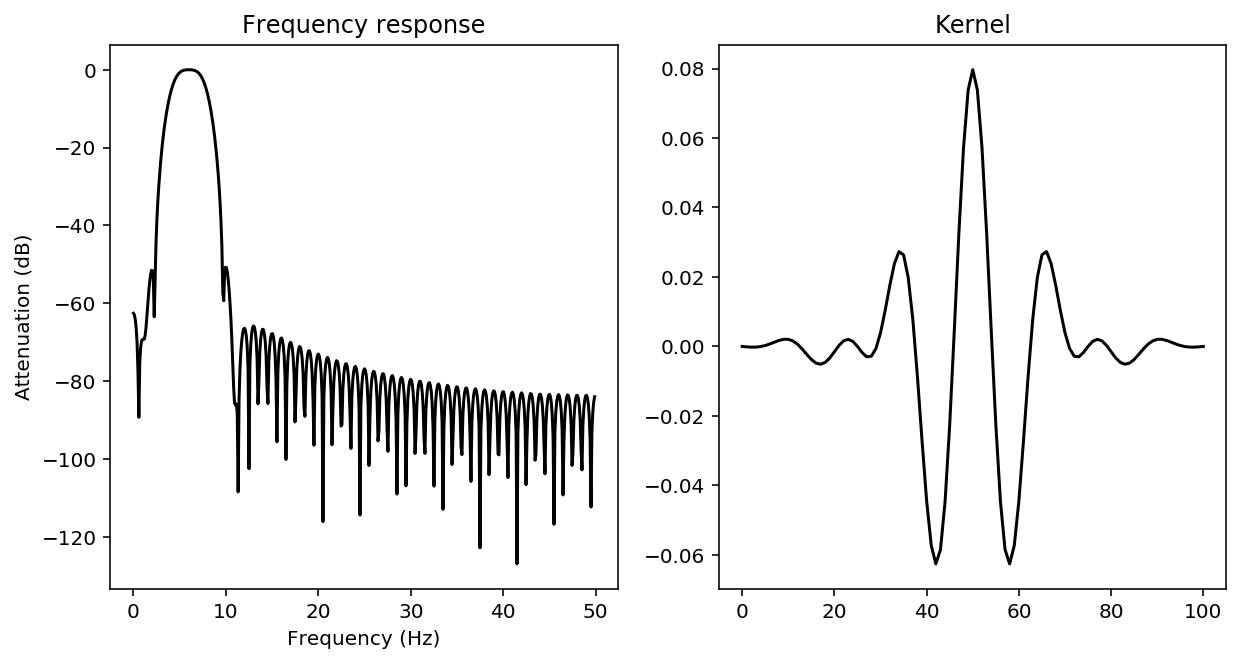

In [9]:
# Visualize the kernels and frequency responses
print('Short filter')
x_filt_short = neurodsp.filter(x, Fs, 'bandpass', f_lo=f_lo, f_hi=f_hi, N_seconds=.1, plot_frequency_response=True)
print('\n\nLong filter')
x_filt_long = neurodsp.filter(x, Fs, 'bandpass', f_lo=f_lo, f_hi=f_hi, N_seconds=1, plot_frequency_response=True)

# 4. Infinite impulse response (IIR) filter option

So far, the filters that we've been using are finite impulse response (FIR) filters. These filters are nice because we have good control over their properties (by manipulating the time-frequency resolution tradeoff through the filter length).

However, sometimes we may not be as concerned witht he precise filter properties, and so there is a faster option: IIR filters. We often use these filters when removing 60Hz line noise.

Here we apply a 3rd order butterworth filter to remove 60Hz noise. Notice that some edge artifacts remain.

/gh/bv/neurodsp/neurodsp/filt.py:101: UserWarning: Edge artifacts are not removed when using an IIR filter.
  warnings.warn('Edge artifacts are not removed when using an IIR filter.')


(0, 0.2)

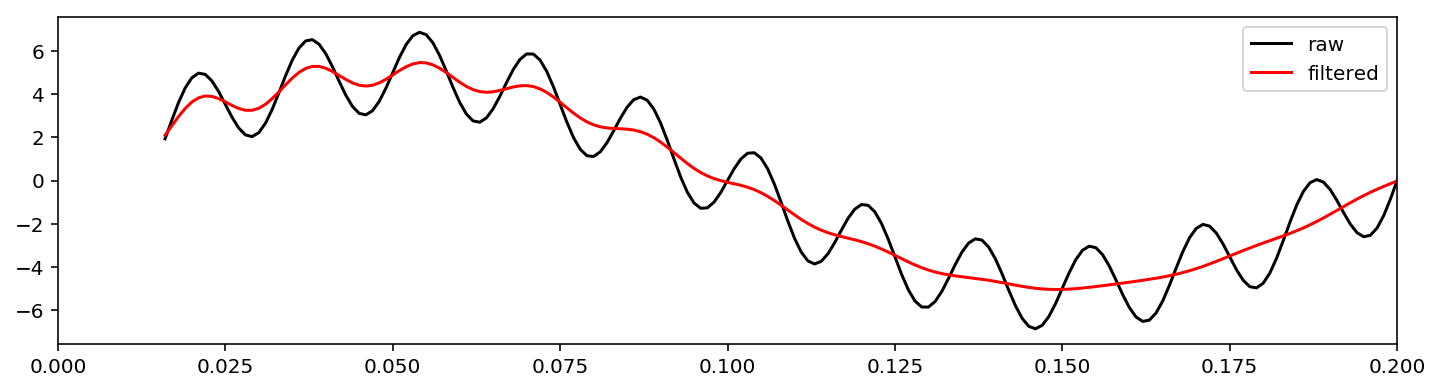

In [10]:
# Generate a signal with a low-frequency drift
np.random.seed(0)
t = np.arange(0,2,.001)
x = 5*np.sin(t*2*np.pi*5) + 2*np.sin(t*2*np.pi*60)
Fs = 1000

# Low-pass filter the signal at 100Hz, just for fun.
x = neurodsp.filter(x, Fs, 'lowpass', f_lo=100)

# Filter the data
f_lo = 58
f_hi = 62
x_filt = neurodsp.filter(x, Fs, 'bandstop', f_lo=f_lo, f_hi=f_hi, iir=True, butterworth_order=3)

# Plot filtered signal
plt.figure(figsize=(12,3))
plt.plot(t, x, 'k', label='raw')
plt.plot(t, x_filt, 'r', label='filtered')
plt.legend(loc='best')
plt.xlim((0,.2))

# 5. Beta bandpass filter on neural signal

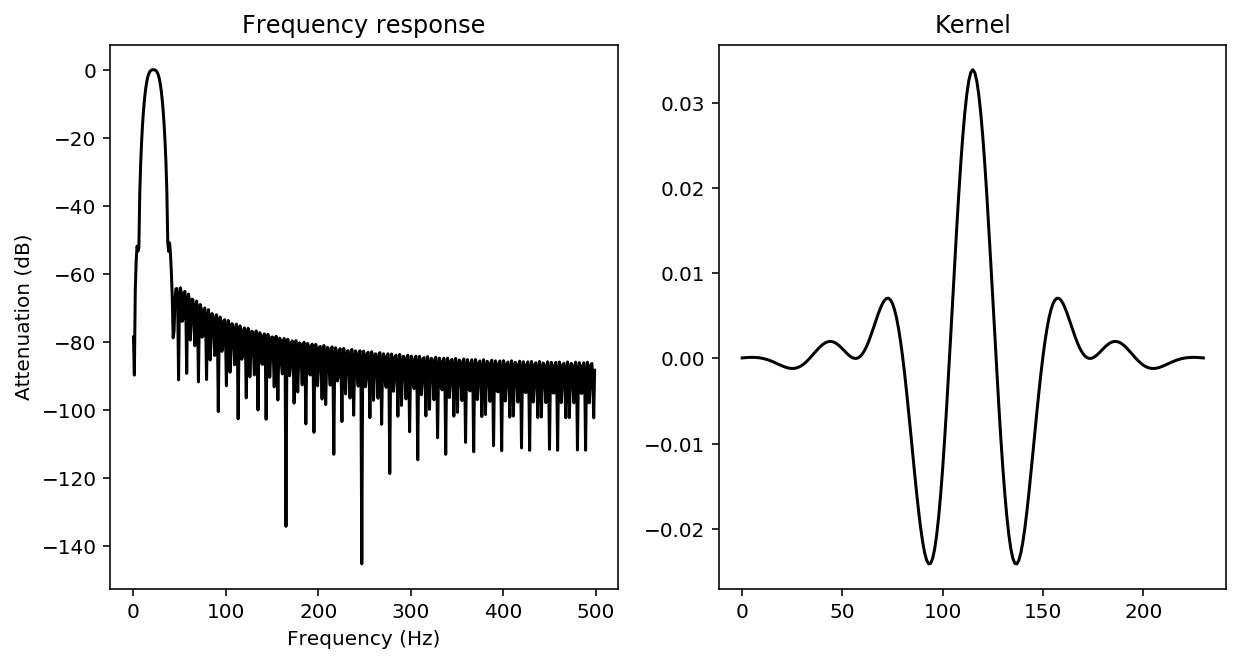

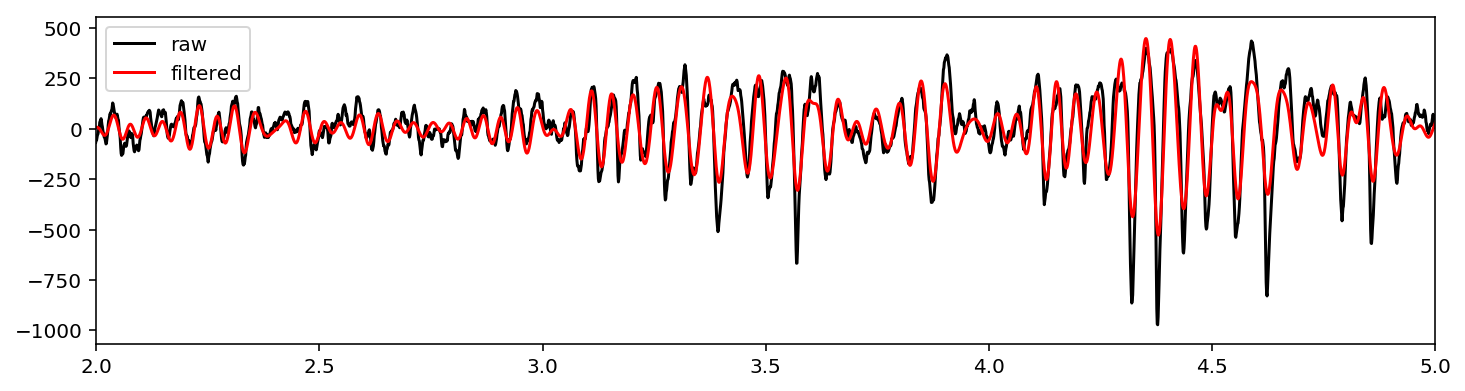

In [11]:
# Generate a signal with a low-frequency drift
x = np.load('./data/sample_data_1.npy')
Fs = 1000
t = np.arange(0,len(x)/Fs,1/Fs)

# Filter the data
f_lo = 13
f_hi = 30
x_filt, kernel = neurodsp.filter(x, Fs, 'bandpass', f_lo=f_lo, f_hi=f_hi, N_cycles=3,
                               plot_frequency_response=True, return_kernel=True)

# Plot filtered signal
plt.figure(figsize=(12,3))
plt.plot(t, x, 'k', label='raw')
plt.plot(t, x_filt, 'r', label='filtered')
plt.xlim((2,5))
plt.legend(loc='best')